# Module 3 Assessment

Welcome to your Mod 3 Assessment. You will be tested for your understanding of concepts and ability to solve problems that have been covered in class and in the curriculum.

Use any libraries you want to solve the problems in the assessment.

You will have up to **two hours** to complete this assessment.

The sections of the assessment are:
- Combinatorics, Probability and Discrete Distributions
- Statistical Distributions
- Statistical Tests
- Bayesian Statistics



In [1]:
# import the necessary libraries
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pickle

## Part 1: Combinatorics, Probability & Discrete Distributions

### a. Set Theory

Given the following probabilities:

$P(A) = 0.7$

$P(B) = 0.5$

$P(B|A) = 0.4$

Find and assign to the variables in the next cell:

1. $P(A and B)$

2. $P(A or B)$

3. $P(A|B)$

4. $P(B|A^{c})$

Hint: draw a diagram!

$P(A \cap B) = P(A\mid B)P(B) $

$P(B|A^{c})$ = $P(B)$ - $P(A and B)$ / $1 - P(A)$

In [2]:
A = 0.7
B = 0.5

In [7]:
ans1 = round(0.4 * A, 2)
ans1

0.28

In [8]:
ans2 = round(A+B-ans1, 2)
ans2

0.92

In [10]:
ans3 = 0.4/B
ans3

0.8

In [15]:
Ac = 1-A
B_and_Ac = B - ans1
B_given_Ac = B_and_Ac / B
Ac, B_and_Ac, B_given_Ac

(0.30000000000000004, 0.21999999999999997, 0.43999999999999995)

### b. Card Combinatorics

You have a standard deck of 52 cards. We define three subsets:

1. What is the probability of drawing a king or a queen?
2. How many possible 5-card combinations can be formed with this deck of 52 cards?
3. Given that you've drawn 5 cards without replacement, what is the probability of getting **2 red cards** and **3 black cards**?


In [17]:
# P(K) = P(Q) = 4 / 52
ans1 = (4/52) * 2
ans1

0.15384615384615385

In [23]:
# _ _ _ _ _ => 52 51 50 49 48 and order does not matter so a 5,4,K,J,9 is considered same as 9,5,K,4,J etc..
ans2 = combination(52,5)
ans2

2598960.0

In [20]:
def factorial(n):
    prod = 1
    while n >= 1:
        prod = prod * n
        n = n - 1
    return prod

In [22]:
def combination(n,k):
    return factorial(n)/((factorial(n-k))*factorial(k))
combination(52,5)

2598960.0

In [82]:
# def permutation(n,k):
#     return factorial(n)/(factorial(n-k))
# permutation(52,5)

In [83]:
# draw red out of 26/52, red out of 25/52, blackout of 26/52, black 25/52, black 24/52
ans3 = (26/52)*(25/51)*(26/50)*(25/49)*(24/48)
ans3

0.03251300520208083

### c. Discrete Probability Distributions

In a game with the same deck of 52 cards, you draw a card $n$ times with replacement. You win a point by drawing a face card (king, queen or jack). 

1. Let $k$ be the number of points won in the game. Write a function that takes in the number of draws, the probability of winning a point and $k$ to return the corresponding probability.

In [123]:
p = (12/52)
def probability_of_scoring_k(n, p, k):
    """
    n = number of draws
    p = probability of winning a point
    k = number of points scored
    
    Use np.factorial()
    
    """
    other = n-k
    if k == 0:
        draw_face = 1
    else:
        draw_face = p**k
    if other > 0:
        draw_other = ((52-12)/52)**other
    else:
        draw_other =1

    prob = draw_other*draw_face

    return prob


2. Using your function, what is the probability of winning 8 points out of 22 draws?


In [164]:
((40/52)**14)*((12/52)**8)

2.0427550226858635e-07

In [165]:
ans2 = probability_of_scoring_k(22, p, 8)
ans2

2.0427550226858635e-07

3. Plot the probability mass function of $k$ in 22 draws.


In [173]:
pmf1 = []
for i in range(1,9):
    pmf1.append((12/52)**i)
pmf1

[0.23076923076923078,
 0.053254437869822494,
 0.012289485662266729,
 0.002836035152830784,
 0.0006544696506532578,
 0.0001510314578430595,
 3.485341334839835e-05,
 8.043095388091928e-06]

In [176]:
pmf2 = []
for i in range(1,15):
    pmf2.append((40/52)**i)
pmf2

[0.7692307692307693,
 0.591715976331361,
 0.4551661356395085,
 0.3501277966457758,
 0.2693290743429045,
 0.20717621103300346,
 0.15936631617923344,
 0.12258947398402573,
 0.09429959537232749,
 0.07253815028640576,
 0.05579857714338905,
 0.042921982417991576,
 0.033016909552301216,
 0.0253976227325394]

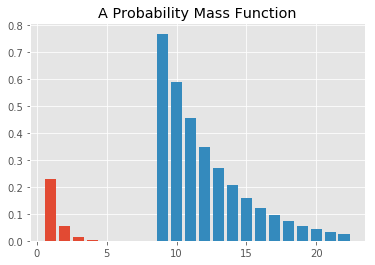

In [177]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

plt.bar([1,2,3,4,5,6,7,8], pmf1 );
plt.bar([9,10,11,12,13,14,15,16,17,18,19,20,21,22], pmf2) ;
plt.title("A Probability Mass Function");

4. Plot the cumulative density function of $k$ in 22 draws.

(array([0.54545455, 0.63636364, 0.77272727, 0.81818182, 0.86363636,
        0.90909091, 0.90909091, 0.95454545, 0.95454545, 1.        ]),
 array([8.04309539e-06, 7.69303157e-02, 1.53852588e-01, 2.30774861e-01,
        3.07697134e-01, 3.84619406e-01, 4.61541679e-01, 5.38463951e-01,
        6.15386224e-01, 6.92308497e-01, 7.69230769e-01]),
 <a list of 1 Patch objects>)

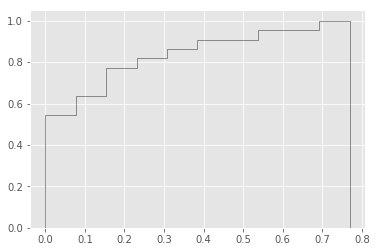

In [182]:
plt.hist(pmf1+pmf2, density=True, cumulative=True, label='CDF',
         histtype='step', alpha=0.8, color='k')

## Part 2: Statistical Distributions

### a. Descriptive Statistics

1. `ratings` is a list of ratings for a TexMex restaurant. Compute the descriptive statistics of `ratings`.

In [30]:
len(ratings)/2

9.0

In [33]:
ratings = [1, 2, 7, 7.5, 8, 8, 8, 8, 8, 
           8, 8, 8, 9, 9, 9, 10, 10, 10]

mean = np.mean(ratings)
median = np.median(ratings)
mode = 8
standard_deviation = np.std(ratings)
number_range = np.max(ratings) - np.min(ratings)
interquartile_range = np.percentile(ratings, 75) - np.percentile(ratings, 25)

print(
"Mean: ", mean, "\n" 
"Median: ", median, "\n"
"Mode: ", mode, "\n"
"Standard Deviation: ", standard_deviation, "\n"
"Range: ", number_range, "\n"
"Interquartile Range: ", interquartile_range)

Mean:  7.694444444444445 
Median:  8.0 
Mode:  8 
Standard Deviation:  2.351942984527715 
Range:  9.0 
Interquartile Range:  1.0


2. What measure of centrality would you use to most fairly describe the ratings and why?

In [ ]:
# Your written answer here
# Median as it is not affect by the low outliers in the range

### b. Continuous Distributions

Say we have data on all $10,000$ checks for this TexMex restaurant and they happen to be normally distributed with $\mu = 20$ and $\sigma = 2$. We can visualize the data as follows: 

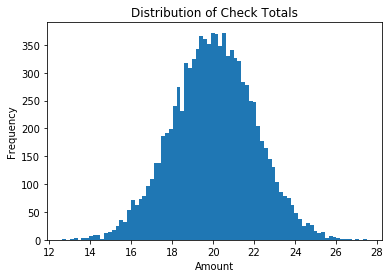

In [34]:
data = pickle.load(open("data/data10000.pkl", "rb"))
plt.title('Distribution of Check Totals')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.hist(data, bins=80)
plt.show()

For the following questions, you may use a [z-table](https://www.math.arizona.edu/~rsims/ma464/standardnormaltable.pdf).

1. Write a function to compute z-scores of single checks.


In [35]:
mu = 20
sigma = 2

def z_score(check_amt):
    z = (check_amt - mu)/sigma
    
    """
    check_amt = the amount for which we want to compute the z-score
    
    """
    
    return z

2. Using $\alpha = 0.05$, is my 23 dollar check significantly **greater** than the mean? Assign boolean `True` for yes, `False` for no to `ans2`.
3. What if my check comes up to 24 dollars?

In [40]:
z_score_23 = z_score(23)
stats.norm.cdf(z_score_23)
alpha = 0.05

if stats.norm.cdf(z_score_23) > 0.95:
    ans2 = True
elif stats.norm.cdf(z_score_23) < 0.95:
    ans2 = False
    
z_score_23, stats.norm.cdf(z_score_23), ans2

(1.5, 0.9331927987311419, False)

In [41]:
z_score_24 = z_score(24)
stats.norm.cdf(z_score_24)
alpha = 0.05

if stats.norm.cdf(z_score_24) > 0.95:
    ans3 = True
elif stats.norm.cdf(z_score_24) < 0.95:
    ans3 = False
    
z_score_24, stats.norm.cdf(z_score_24), ans3

(2.0, 0.9772498680518208, True)

4. Define **confidence interval** and determine the 95% confidence interval for this population.

In [146]:
n_4 =10000
x_bar_4 = 20
s_4= 2
conf_int_4 = 0.975

In [145]:
stats.norm.interval(alpha = 0.975, loc = x_bar_4, scale = s_4)

(15.51719454479011, 24.482805455209892)

In [ ]:
# Your written answer here
# The interpretation of a confidence interval has the basic template of: 
# "We are 'some level of percent confident (95% in this case)' 
# that the 'population of interest' is from 'lower bound to upper bound'. 
# The phrases in single quotes are replaced with the specific language of the problem. 

5. Say we don't know how our population of checks is distributed. How does **sampling** and the **Central Limit Theorem** allow us to **make inferences on the population mean**, i.e. estimate $\mu, \sigma$ of the population mean?

In [ ]:
# Your written answer here
# Accroding to the central limit theorem, a large number of samples from the population and calculating their mean
# will lead to forming a normal distribution of thoes means. This means we can use the mean and standard deviation 
# of the sample to estimate inferences on the population mean

## Part 3: Statistical Testing

### a. Hypotheses and Errors

This TexMex restaurant recently introduced Queso to its menu. The restaurant owners want to know if customers ordering Queso end up spending **more or less**. Let the average amount on Queso customers' checks be $X_{Q}$.

1. Set up the null and alternative hypotheses for this test.

$H_{0}:$ `The cost of the Queso menu is equal to the average XQ`

$H_{A}:$ `The cost of the Queso menu is not equal to average XQ`

2. In this context, what does it mean to make `Type I` and `Type II` errors?

In [ ]:
# Your written answer here
"""

                    reality: H0: true -               | H0: false and                 H0: false and
                    Queso is equal to mean.           |  menu is more exp.              menu is less exp.

                
Description

H0: rejectd        Type I error - customer will end  |  Correct -                      Correct - 
                    up paying less while owner       |
                    expects more revenue             |
    
H0: fail to reject  Correct - expectations meet      |  Type II error- customers        Type II error - customers will
                    reality                          | are not happy as they will pay   be happy to pay less, owner
                                                        more than expected              will get less revenue than
                                                                                            expected

"""

### b. Sample Testing

Now assume we don't have reliable data on the population. With $\alpha = 0.05$, we want to determine if Queso checks are significantly more **or** less than normal. We have random samples of Queso and Non-Queso checks. The samples are in the graphs below and you may assume they have equal variances.

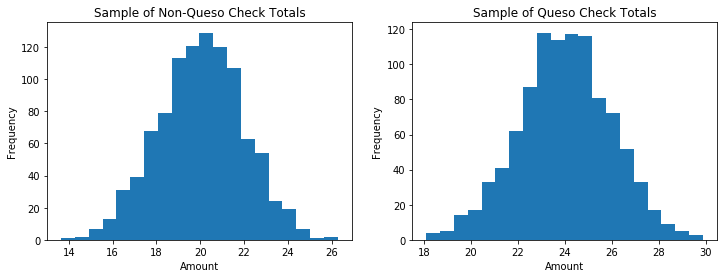

In [48]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

np.random.seed(43)
no_queso = np.random.choice(data, 1000)
ax1.set_title('Sample of Non-Queso Check Totals')
ax1.set_xlabel('Amount')
ax1.set_ylabel('Frequency')
ax1.hist(no_queso, bins=20)

queso = pickle.load(open("data/queso.pkl", "rb"))
ax2.set_title('Sample of Queso Check Totals')
ax2.set_xlabel('Amount')
ax2.set_ylabel('Frequency')
ax2.hist(queso, bins=20)
plt.show()

1. Run a `statistical test` on the two samples to determine whether you should reject your null hypothesis.

In [50]:
len(no_queso), len(queso)

(1000, 1000)

In [53]:
stats.normaltest(queso), stats.normaltest(no_queso)

(NormaltestResult(statistic=0.8922087282666396, pvalue=0.6401169633233892),
 NormaltestResult(statistic=0.9457794328355713, pvalue=0.623198795983632))

In [58]:
if stats.normaltest(queso)[1] < 0.001:  
    print("The null hypothesis( it is normally distributed) can be rejected")
else:
    print("The null hypothesis( it is normally distributed) cannot be rejected")

The null hypothesis( it is normally distributed) cannot be rejected


In [59]:
if stats.normaltest(no_queso)[1] < 0.001:  
    print("The null hypothesis( it is normally distributed) can be rejected")
else:
    print("The null hypothesis( it is normally distributed) cannot be rejected")

The null hypothesis( it is normally distributed) cannot be rejected


In [65]:
z1 = np.mean(queso)-20/

3.9452820976956353

0.08730204010568128

16.748361541947485

2. What are the conditions required to perform the test you chose?

In [ ]:
# Your written answer here
#
# The samples from two populations are independent if the samples selected from one of the populations has no relationship with the samples selected from the other population.

## Part 4: Bayesian Statistics
### a. Bayes' Theorem

Thomas wants to get a new puppy 🐕 🐶 🐩 


<img src="https://media.giphy.com/media/rD8R00QOKwfxC/giphy.gif" />

He can choose to get his new puppy either from the pet store or the pound. The probability of him going to the pet store is $0.2$. 

He can choose to get either a big, medium or small puppy.

If he goes to the pet store, the probability of him getting a small puppy is $0.6$. The probability of him getting a medium puppy is $0.3$, and the probability of him getting a large puppy is $0.1$.

If he goes to the pound, the probability of him getting a small puppy is $0.1$. The probability of him getting a medium puppy is $0.35$, and the probability of him getting a large puppy is $0.55$.

1. What is the probability of Thomas getting a small puppy?
2. Given that he got a large puppy, what is the probability that Thomas went to the pet store?
3. Given that Thomas got a small puppy, is it more likely that he went to the pet store or to the pound?
4. For Part 2, what is the prior, posterior and likelihood?

In [ ]:
                0.6 small
0.2 pet store   0.3 med
                0.1 large
    
                0.1 small
0.8 pound       0.35 med
                0.55 large

In [ ]:
ans1 = (0.2*0.6)+(0.8*0.1)

In [75]:
#P(PS|L)

P_L = 0.1*0.2 + 0.8*0.55 # probability of getting a large pup
P_LandPS = 0.2 * 0.1    # large pup and from pet store
ans2 = P_LandPS/P_L
ans2

0.043478260869565216

In [79]:
P_S = 0.6*0.2 + 0.1*0.8 # probability of getting a small pup
P_SandPS = 0.2 * 0.6 # small pup and from Pet store
P_SandP = 0.8 * 0.1 # small pup and from pound
P_S, P_SandPS, P_SandP

(0.2, 0.12, 0.08000000000000002)

In [80]:
P_SandPS/P_S

0.6

In [81]:
P_SandP/P_S

0.4000000000000001

In [ ]:
ans3 = "from pet store"

In [ ]:
ans4_prior = "answer here"
ans4_posterior = "answer here"
ans4_likelihood = "answer here"